<style>

h1 {
    color: #fff;
    text-align: center;
    font-size: 80px;
    margin-bottom: 40px;
    margin-top: 60px;
}


p {
    color:#fff;
    font-size: 24px;
    text-align: center;
    margin-bottom: 10px;
}

.details {
    border: 2px solid #fff;
    padding: 20px;
    border-radius: 60px;
    margin: auto;
    max-width: 600px;
    margin-bottom: 30px;
}
</style>

<h1>Customer Churn</h1>

<div class="details">
    <p><strong>Integrantes:</strong> Brayan Garzón, Kevin Güiza, Julian</p>
    <p><strong>Curso:</strong> Machine Learning UIFCE</p>
    <p><strong>Fecha:</strong> Julio de 2023</p>
</div>

# Análisis de Customer Churn

El objetivo de este trabajo es realizar un análisis y exploración inicial de datos para un problema de **Customer Churn**, que se refiere a la tasa de pérdida de clientes en un negocio. Nuestro objetivo es comprender las características de los datos, identificar patrones y realizar hipótesis analíticas para cada tipo de variable en el conjunto de datos, siguiendo lo aprendido en el curso.

## Pregunta a responder:

a) **Variable objetivo:** La variable objetivo de nuestro conjunto de datos es la que queremos predecir, en este caso, sería la variable que representa el Customer Churn. Es decir, si un cliente deja de utilizar los servicios o productos de la empresa.

b) **Problema de Clasificación:** Este es un problema de clasificación (aprendizaje supervizado con variable objetivo categórica) ya que queremos predecir si un cliente se va (1) o no se va (0) basado en un conjunto de características.

In [1]:
# Importar paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sys

sys.path.append("..")
from utility import plot_settings


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de datos
data = pd.read_csv('../data/Customer_Churn.csv', sep=';')

In [3]:
# Eliminamos la variable que no aporta información relevante (identificador de cliente)
df = data.copy()
df.drop(columns='CustomerID', inplace=True)

### C. Exploración inicial de datos
Realizaremos una exploración inicial para comprender la estructura del dataset, en búsqueda de la siguiente información en concreto:

- Dimensiones del dataset.
- Tipo de datos de cada variable.
- Cantidad de valores nulos.

In [4]:
df.head()

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Usage Frequency    440832 non-null  float64
 3   Support Calls      440832 non-null  float64
 4   Payment Delay      440832 non-null  float64
 5   Subscription Type  440832 non-null  object 
 6   Contract Length    440832 non-null  object 
 7   Total Spend        440832 non-null  float64
 8   Last Interaction   440832 non-null  float64
 9   Churn              440832 non-null  float64
dtypes: float64(7), object(3)
memory usage: 33.6+ MB


- **Dimensiones del dataset:** 440 832 registros con 10 variables cada uno.
- **Tipo de datos de cada variable:**
    - _CustomerID:_ Identificador del cliente. _Float_
    - _Age:_ Edad. _Float_
    - _Gender:_ Género. _String_
    - _Usage Frequency:_ Cantidad máxima de días seguidos que se hizo uso del servicio. _Float_
    - _Support Calls:_ Cantidad de llamadas a atención al cliente realizadas durante la suscripción. _Float_
    - _Payment Delay:_ Cantidad de días de atraso en el pago del servicio. _Float_
    - _Subscription Type:_ Tipo de suscripción. _String_
    - _Contract Length:_ Tipo de duración de suscripción. _String_
    - _Total Spend:_ Gasto de la suscripción. _Float_
    - _Last Interaction:_ Cantidad de días transcurridos desde la última interacción. _Float_
    - _Churn:_ 1 si el cliente canceló el servicio; 0 si no lo canceló. _Float_
- **Cantidad de valores nulos:** no hay ningún valor nulo con el que lidiar.

_¿El conjunto de datos sirve para ML?_ Cualquier dataset será adecuado para hacer Machine Learning en la medida en que se realice un adecuado preprocesamiento de datos para manejar los valores nulos, variables categóricas y numéricas, y demás procedimientos para adecuar los datos a las necesidades de los modelos de aprendizaje utilizados.

En nuestro caso es posible plantear un problema de aprendizaje supervizado, pues tenemos información sobre las variables objetivo y explicativas en todos los registros. Además, el conjunto de datos es, al parecer, de un tamaño y características satisfactorias para formular conclusiones de investigación generalizables con respecto al problema de negocio.

### D. Análisis de frecuencia de variables categóricas:
Examinaremos la frecuencia de las variables categóricas, identificaremos el balance de clases en la variable objetivo y buscaremos patrones entre las variables categóricas.

**Metodología (análisis univariado):** se creó una función para facilitar la graficación de las variables. Esto facilitará la comprensión de la frecuencia y proporción univariada de cada categoría.

In [6]:
# plot_cat: función para realizar análisis de frecuencias
def plot_cat(df, col):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    counts = df[col].value_counts()
    plt.pie(counts, labels=counts.index, colors=sns.color_palette('viridis'), autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

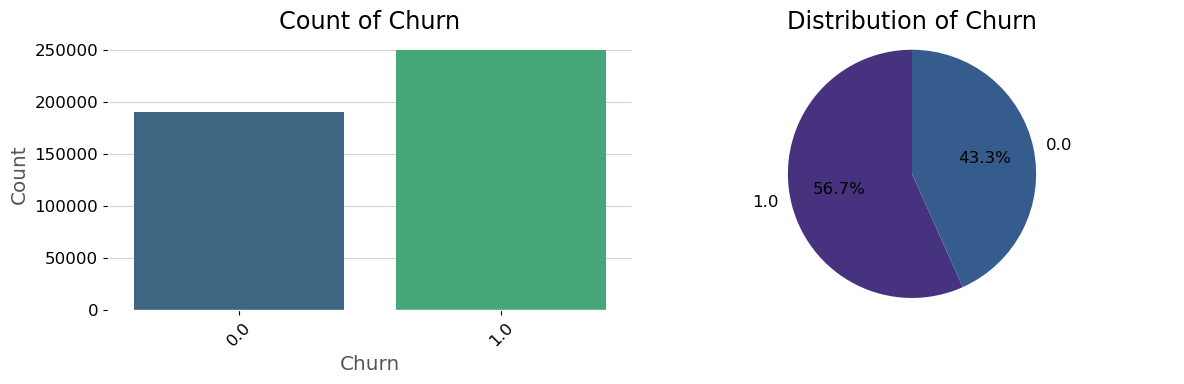

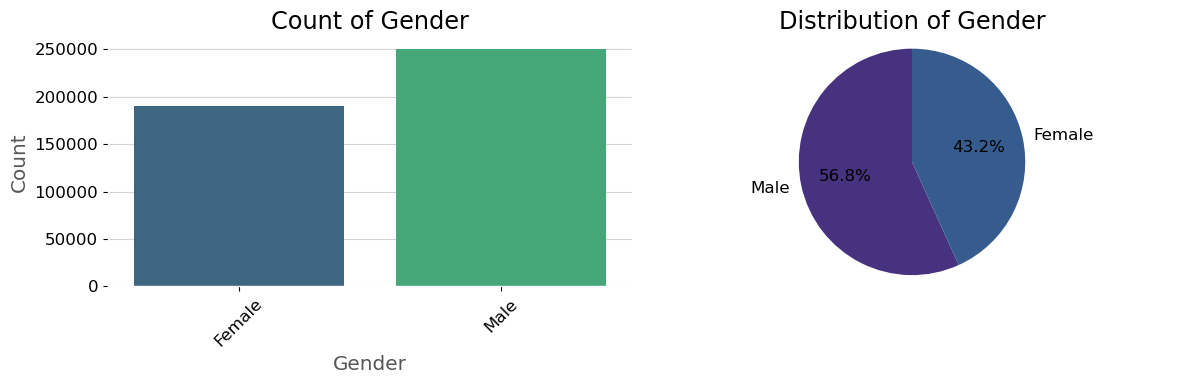

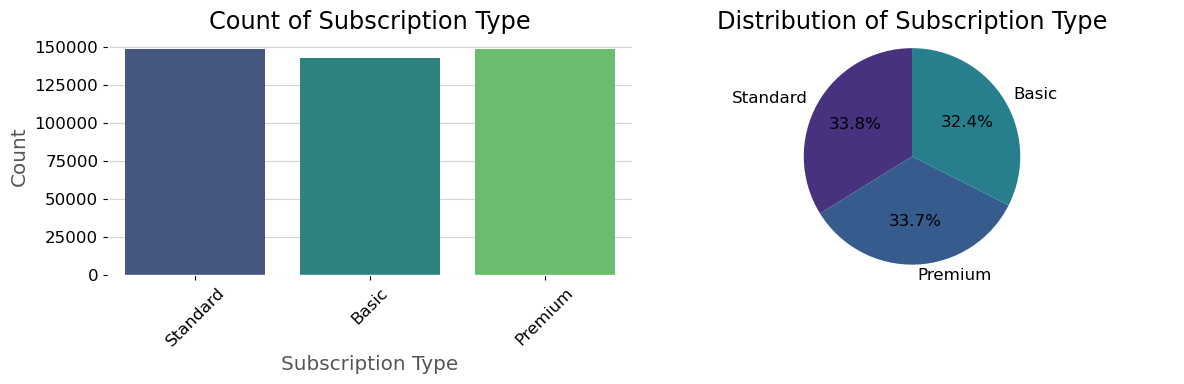

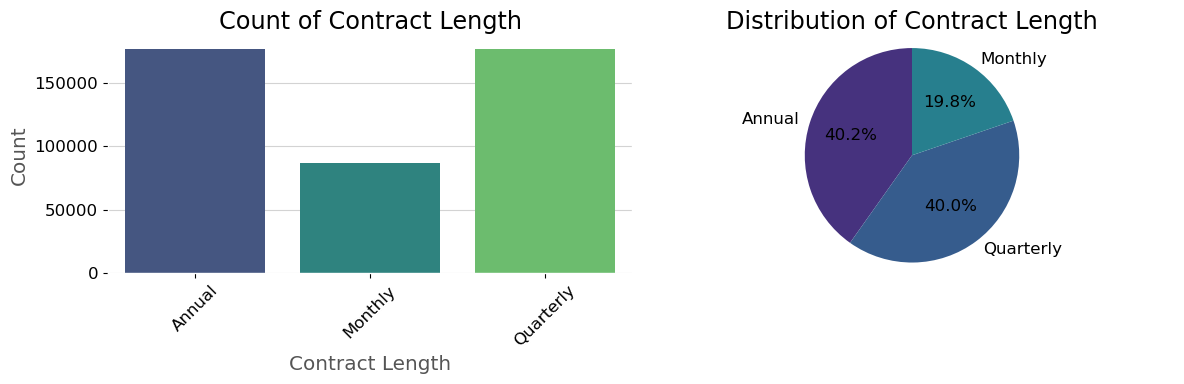

In [7]:
cat_cols = ['Churn', 'Gender', 'Subscription Type', 'Contract Length']
for col in cat_cols:
    plot_cat(df, col)

**Resultados (análisis univariado):** este ejercicio refleja el aspecto cualitativo de la relación entre los clientes del servicio y la plataforma:
- _Pérdida de clientes:_ un 56.7% de los clientes en el conjunto de datos canceló el servicio. En términos del problema que nos convoca, esto sugiere la necesidad empresarial de impulsar iniciativas para impedir la fuga de clientes, y además la necesidad técnica de realizar un ligero balanceo de clases.
- _Género:_ la mayoría no absoluta de los clientes del servicio son hombres.
- _Tipo de suscripción:_ los clientes se distribuyen simétricamente entre los 3 planes ofrecidos por la plataforma (básico, estándar y premium).
- _Duración del contrato:_ la duración de contrato menos frecuente es la mensual. El resto se distribuye equitativamente entre la duración anual y trimestral.

**Metodología (análisis multivariado):** Plantear preguntas relevantes en relación al problema de negocio usando más de una variable.

### E. Análisis de distribución de variables numéricas:
Analizaremos si las variables numéricas siguen una distribución normal y buscaremos asimetrías. Formularemos hipótesis sobre la distribución de las variables numéricas, apoyándonos en gráficos y medidas univariadas. 

Las siguientes son las variables a analizar y sus unidades de medida:
- _Edad:_ años.
- _Frecuencia de uso:_ días consecutivos.
- _Llamadas a atención al cliente:_ número de llamadas.
- _Atraso en el pago:_ días.
- _Gasto total:_ dinero.
- _Última interacción:_ días (transcurridos desde la última interacción)

**Metodología (análisis univariado):** análogo a la sección anterior, se planteó una función para facilitar la graficación de las variables (histograma y boxplot).

In [8]:
# Variables numéricas
# plot_num: función para realizar análisis de distribución (histograma y boxplot)
def plot_num(df, col, bins):
    fig, axes = plt.subplots(figsize=(12, 4), ncols=2)
    
    sns.histplot(data=df, x=col, kde=True, color='#2E86C1', ax=axes[0], bins=bins)
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    
    sns.boxplot(data=df, x=col, color='#2E86C1', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

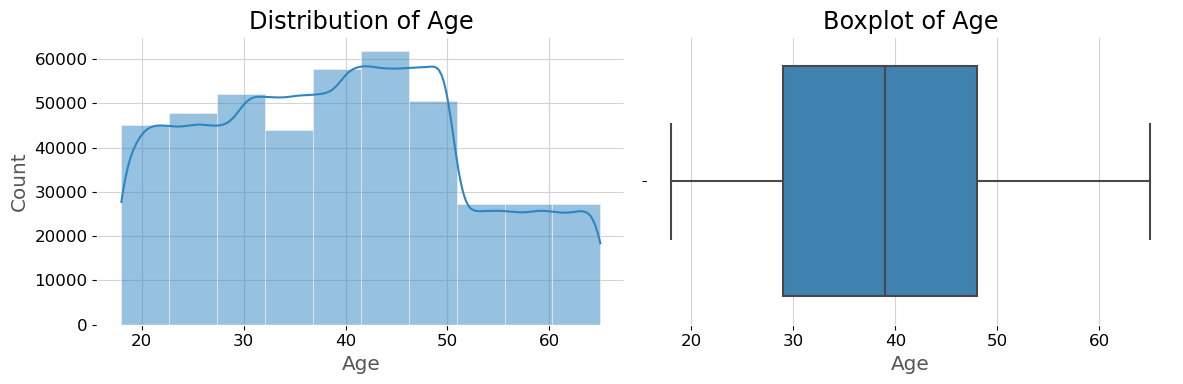

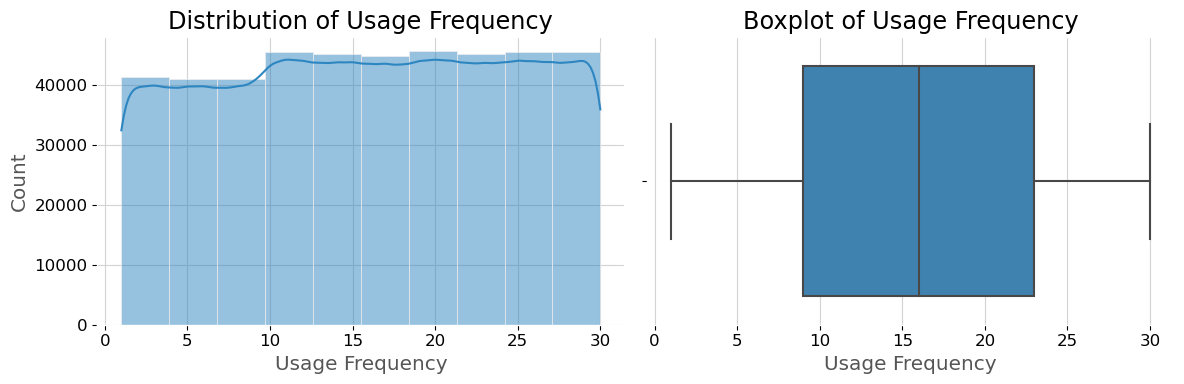

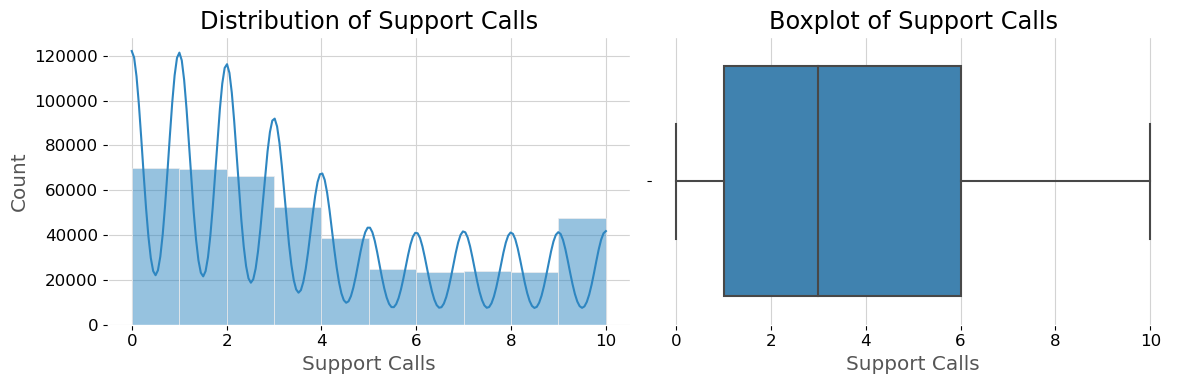

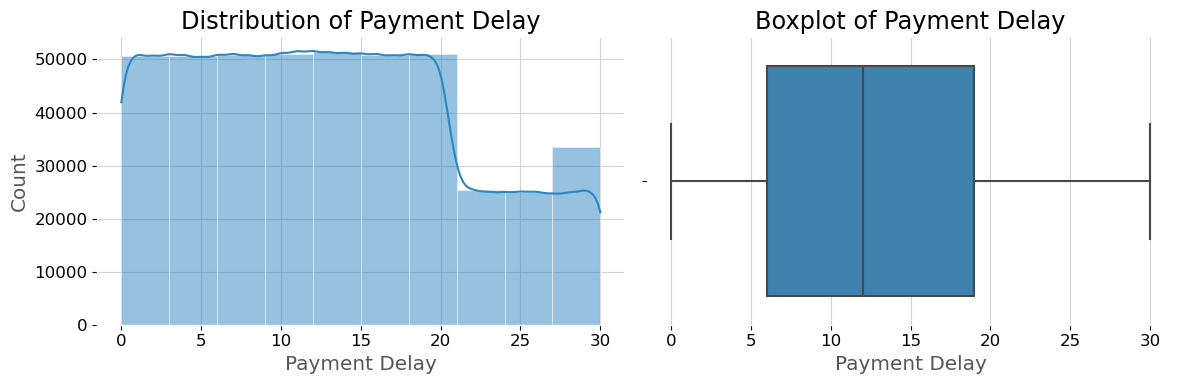

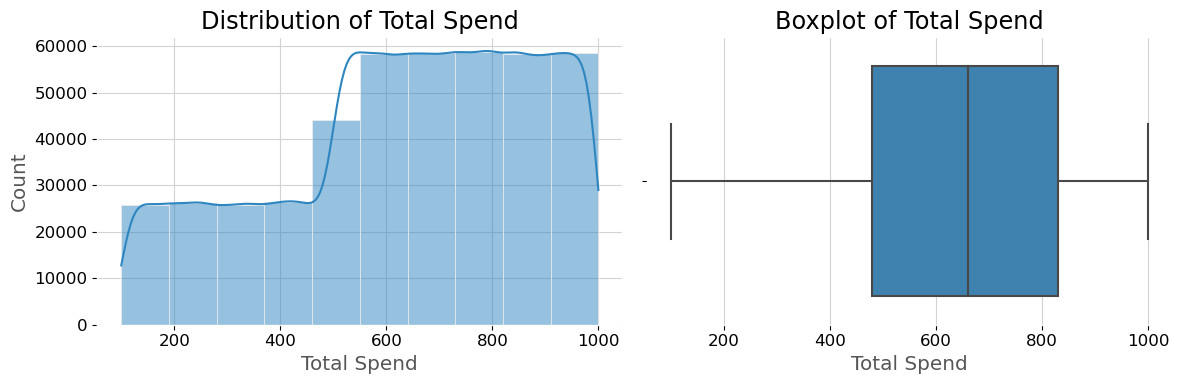

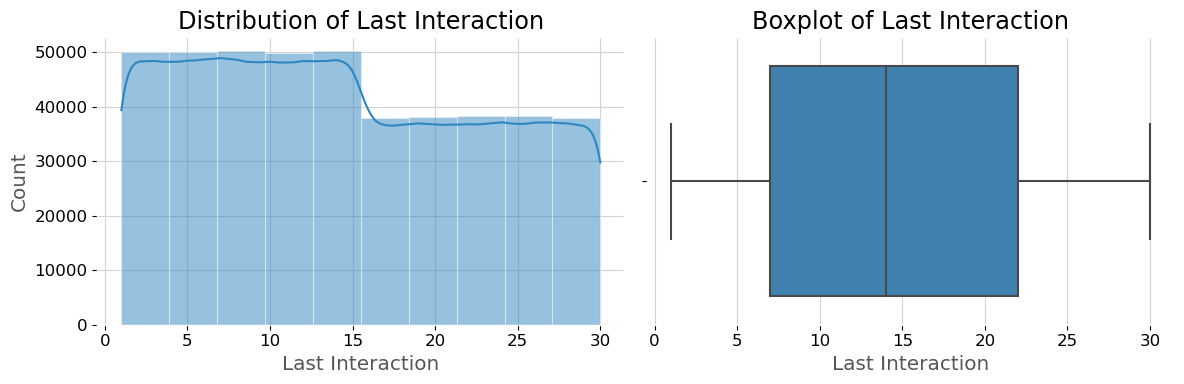

In [9]:
numeric_cols = ['Age','Usage Frequency','Support Calls','Payment Delay','Total Spend', 'Last Interaction']
n_bins = 10

for col in numeric_cols:
       plot_num(df, col, n_bins)

In [16]:
def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis=1).agg(stats))

describe(df, ['median', 'kurtosis', 'skew'])

,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000
median,39.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
kurtosis,-0.864853,-1.175815,-0.745912,-0.895678,-0.751489,-1.153760,-1.926632


**Resultados: (análisis univariado)** gracias a los gráficos podemos hacernos una mejor idea del comportamiento de las variables potencialmente relacionadas al comportamiento de la variablemente objetivo:
- No se evidencian datos atípicos.
- Es inadecuado suponer a la ligera que alguna de las variables está distribuida normalmente. Visualmente, las variables que más se acercan a este ideal son la edad y el número de las llamadas a atención al cliente (se puede explicar el comportamiento inestable de la función de densidad de probabilidad de esta última variable desde el hecho de que esta es discreta y no continua).
- Por otro lado, el resto de las variables pareciera amoldarse más a una distribución normal. Las desviaciones de esta generalidad podrían evidenciar patrones diferenciados de comportamiento que a su vez podrían guardar relación con la permanencia o no de los clientes.

**Metodología (análisis multivariado):** Plantear preguntas relevantes en relación al problema de negocio usando más de una variable.

### F. Análisis de distribución intercuartílica para problemas de clasificación:
Ya que el problema es de clasificación analizaremos la distribución intercuartílica de las variables numéricas dividiendo por categorías de las variables categóricas relevantes, comenzando por la variable objetivo. Identificaremos aspectos relevantes de este análisis.

### G. Análisis de correlación entre variables numéricas:
Buscaremos correlaciones problemáticas entre las variables numéricas de nuestro conjunto de datos.

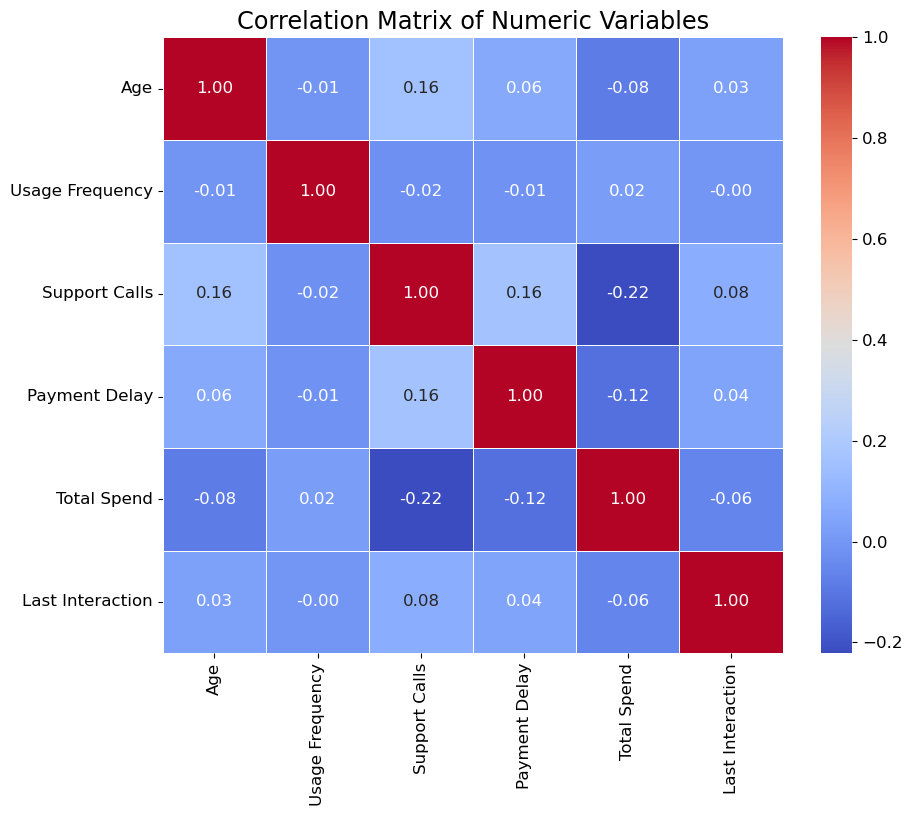

In [11]:
def correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Variables')
    plt.show()
    
correlation_heatmap(df[numeric_cols])


**Resultados:** no parece haber una correlación significativa entre las variables explicativas. El vínculo lineal más fuerte es la relación inversa entre el gasto total y el número de llamadas a atención al cliente (coeficiente de Pearson = -0.22).

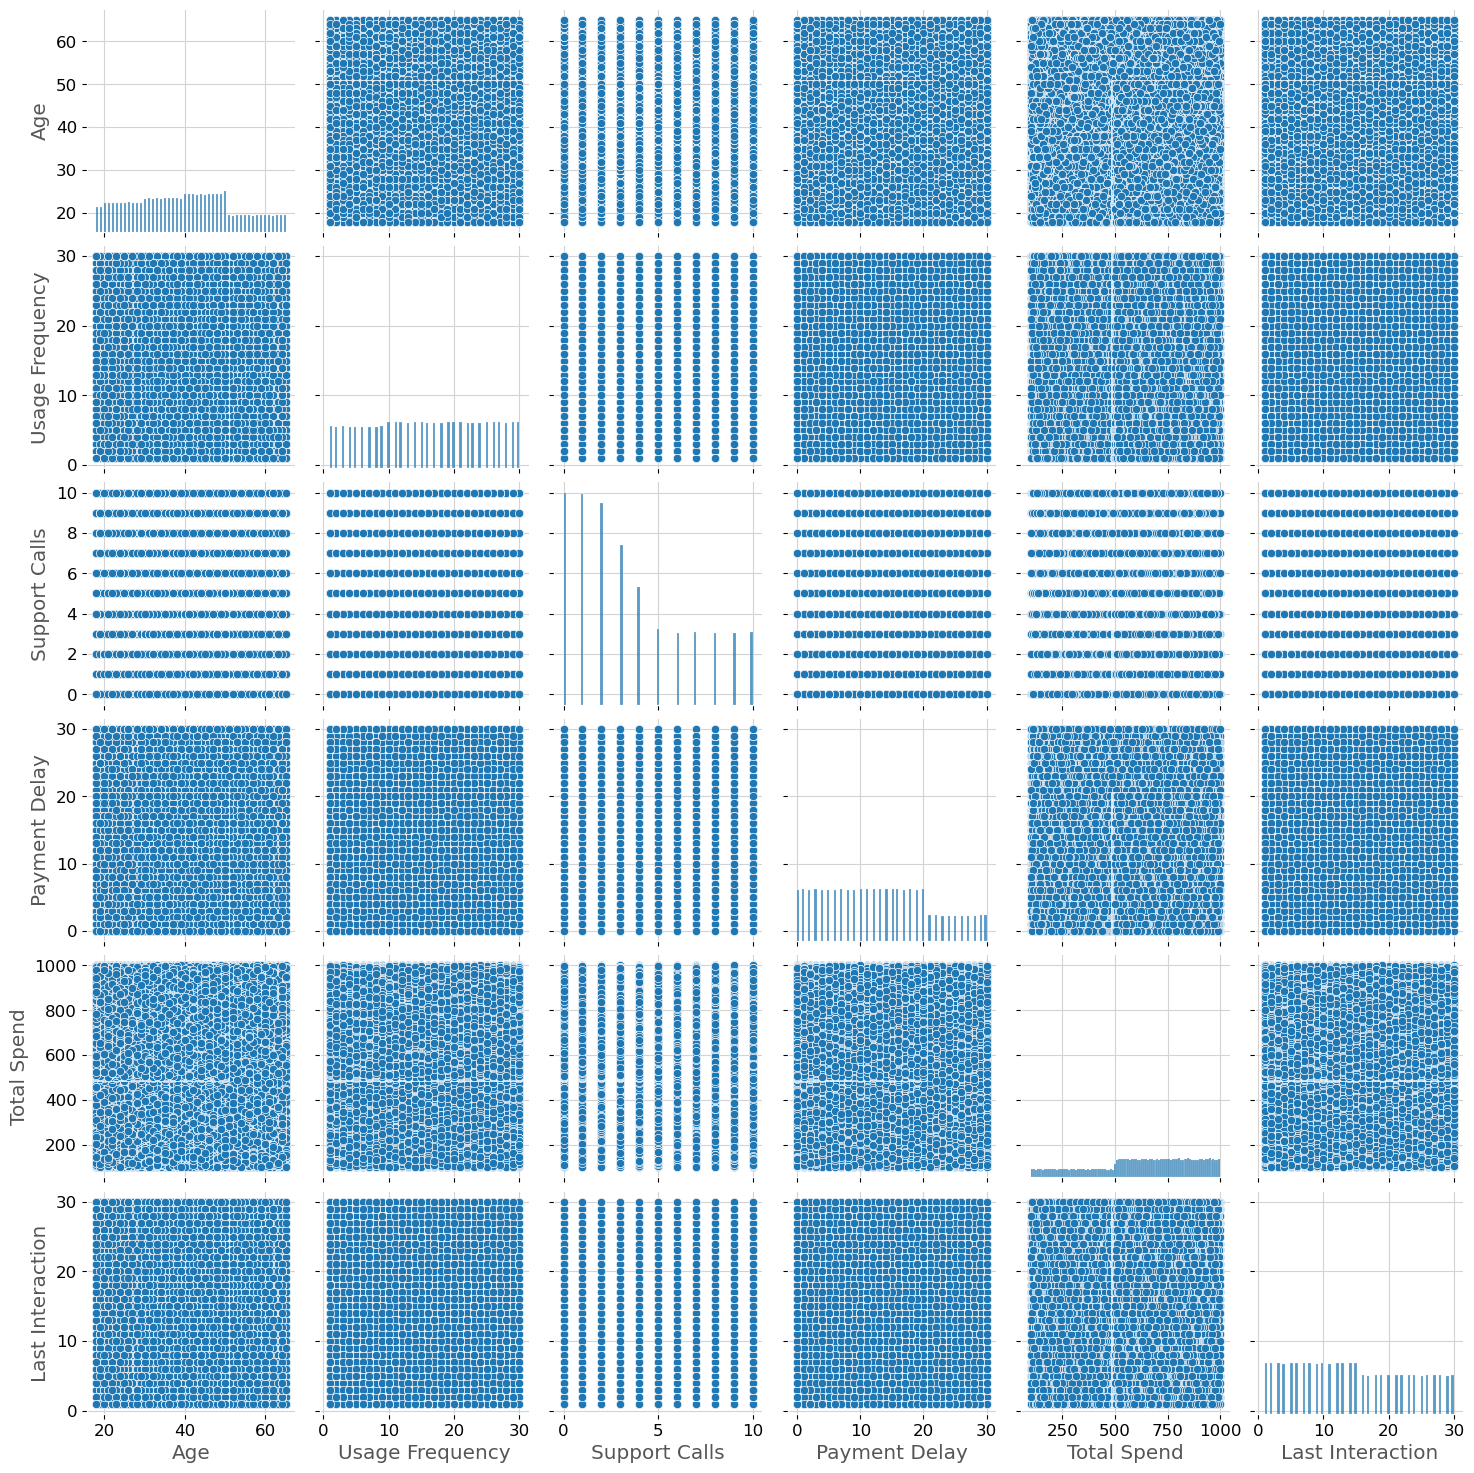

In [24]:
# df['Churn'] = df['Churn'].apply(str)
sns.pairplot(df[numeric_cols])#, hue='Churn')
plt.show()